# <center>Проект построения модели машинного обучения для бинарной классификации</center>

In [27]:
# Импортируем все необходимые библиотеки
import numpy
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

from sklearn.feature_selection import RFE

Важно, чтобы компании, работающие с кредитными картами, могли распознавать мошеннические операции с кредитными картами, с которых клиенты не взимали плату за товары, которые они не приобрели.

<p>Он содержит только численные переменные ввода, которые являются результатом преобразования PCA. К сожалению, из-за проблем с конфиденциальностью, мы не можем предоставить оригинальные функции и более справочную информацию о данных. Особенности V1, V2, ... V28 являются основными компонентами, полученными с PCA, только функции, которые не были преобразованы с PCA являются "Время" и "Сумма". </p>
<p>Функция "Время" содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. </p>
<p>Функция "Сумма" - это сумма транзакции, эту функцию можно использовать, например, для зависимого от затрат обучения. </p>
<p>Функция 'Класс' является переменной ответа, и она занимает значение 1 в случае мошенничества и 0 в противном случае.</p>

In [22]:
filename = 'D:/Desktop/homework/daata for mash learning/creditcard.csv'
dataframe = read_csv(filename)
dataframe.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Анализ данных

In [23]:
# размер данных
dataframe.shape

(284807, 31)

In [24]:
# типы данных
dataframe.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [25]:
array = dataframe.values
X = array[:,0:30]
Y = array[:,30]

In [28]:
# отбор признаков
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

c:\program files\python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 10
Selected Features: [False False False False  True False False False  True  True  True False
 False  True  True False  True False False False False  True  True False
 False False False  True False False]
Feature Ranking: [21 11 12 16  1  6  9 13  1  1  1 17 15  1  1  8  1 18 19 10  3  1  1  2
  5  7 14  1  4 20]


In [29]:
dataframe = dataframe.drop(['Time', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V11', 'V12', 'V15', 'V17', 'V18', 'V19', 'V20', 
                            'V23', 'V24', 'V25', 'V26', 'V28', 'Amount'], axis=1)

In [30]:
dataframe.head()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
0,1.378155,0.098698,0.363787,0.090794,-0.991390,-0.311169,-0.470401,-0.018307,0.277838,0.133558,0
1,0.448154,0.085102,-0.255425,-0.166974,0.489095,-0.143772,0.463917,-0.225775,-0.638672,-0.008983,0
2,0.379780,0.247676,-1.514654,0.207643,0.717293,-0.165946,-2.890083,0.247998,0.771679,-0.055353,0
3,-0.863291,0.377436,-1.387024,-0.054952,0.507757,-0.287924,-1.059647,-0.108300,0.005274,0.062723,0
4,0.403034,-0.270533,0.817739,0.753074,1.345852,-1.119670,-0.451449,-0.009431,0.798278,0.219422,0


In [31]:
# статистические характеристики
dataframe.describe()

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,2.074095e-15,1.213481e-16,-2.406331e-15,2.239053e-15,8.190001e-16,1.207294e-15,1.437716e-15,1.654067e-16,-3.568593e-16,-3.660091e-16,0.001727
std,1.415869e+00,1.194353e+00,1.098632e+00,1.088850e+00,9.952742e-01,9.585956e-01,8.762529e-01,7.345240e-01,7.257016e-01,4.036325e-01,0.041527
min,-5.683171e+00,-7.321672e+01,-1.343407e+01,-2.458826e+01,-5.791881e+00,-1.921433e+01,-1.412985e+01,-3.483038e+01,-1.093314e+01,-2.256568e+01,0.000000
25%,-8.486401e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-6.485393e-01,-4.255740e-01,-4.680368e-01,-2.283949e-01,-5.423504e-01,-7.083953e-02,0.000000
50%,-1.984653e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-1.356806e-02,5.060132e-02,6.641332e-02,-2.945017e-02,6.781943e-03,1.342146e-03,0.000000
75%,7.433413e-01,3.273459e-01,5.971390e-01,4.539234e-01,6.625050e-01,4.931498e-01,5.232963e-01,1.863772e-01,5.285536e-01,9.104512e-02,0.000000
max,1.687534e+01,2.000721e+01,1.559499e+01,2.374514e+01,7.126883e+00,1.052677e+01,1.731511e+01,2.720284e+01,1.050309e+01,3.161220e+01,1.000000


In [32]:
# распределение классов
dataframe.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [33]:
df_zero = dataframe[(dataframe['Class']==0)]
df_zero = df_zero.sample(frac = 1)
df_zero[0:283315]

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
19379,-0.426585,-0.005699,-0.463299,0.061543,-0.916205,-1.125103,0.983337,-0.024771,-0.298653,0.011550,0
199598,4.099706,-0.048342,-0.626418,1.357510,-1.014184,0.290669,0.771532,-0.406066,-1.344226,-0.026675,0
37150,-1.272952,0.691097,-0.246073,-0.743414,-0.719881,0.598721,0.647711,0.022329,-0.058026,0.058341,0
114008,-0.701892,0.130378,-0.425213,0.594330,1.050013,-0.681363,1.604119,0.394520,0.913562,0.024536,0
150839,1.056036,-0.332578,0.238888,0.042800,0.327864,2.683528,-0.766107,0.206658,0.905809,0.424651,0
...,...,...,...,...,...,...,...,...,...,...,...
29323,1.288840,0.057219,-0.857032,-0.241410,-0.114412,0.381845,-0.741372,0.225266,0.548315,0.080565,0
208375,-0.337782,-0.201749,0.256163,0.229731,-1.828870,1.312787,-0.166077,0.126097,0.365870,-0.104046,0
55337,2.315678,-0.101361,-0.760939,0.647209,0.906592,0.082674,0.961391,-0.116667,-0.428988,-0.010141,0
162299,-0.842316,0.727706,0.608606,-0.075186,-0.141238,0.690972,-0.371962,0.269765,0.844627,0.027735,0


In [34]:
fd = dataframe
fd = fd.drop(df_zero[0:283315].index, axis=0)
fd

,V4,V8,V9,V10,V13,V14,V16,V21,V22,V27,Class
243,3.003261,-0.143932,-0.918043,0.886323,-0.064504,-0.275189,-0.646153,-0.177298,-0.180260,0.204039,0
541,3.997906,1.391657,-2.770089,-2.772272,-0.595222,-4.289254,-1.140747,0.517232,-0.035049,0.261145,1
564,-3.774039,0.044961,1.968388,-2.245798,-0.047105,-0.383137,-0.410726,0.325067,1.155921,0.014806,0
588,-1.194077,0.660924,-0.319588,-0.128709,-0.108980,-0.467947,0.583543,-0.309462,-0.836051,0.060371,0
623,2.288644,-0.067794,-0.270953,-0.838587,0.676502,-1.692029,0.666780,0.661696,0.435477,-0.252773,1
...,...,...,...,...,...,...,...,...,...,...,...
282780,0.403910,-0.314407,0.589555,0.082376,-0.213814,0.328880,-0.073867,-0.297300,-0.733464,-0.072491,0
283852,-0.942649,0.176908,-0.213775,-0.987930,-0.554876,0.722065,-0.415307,-0.038173,-0.105087,0.211823,0
284030,-0.645215,0.666818,-0.472763,-0.994709,0.167023,0.777182,-1.175535,0.493283,1.475206,0.104573,0
284330,4.757130,0.831410,-0.943824,2.151493,0.362325,0.224283,0.330221,0.330137,1.156144,-1.624107,0


In [35]:
fd.groupby('Class').size()

Class
0    1000
1     492
dtype: int64

In [36]:
dataframe = fd

## Визуализация

### Одномерные графики

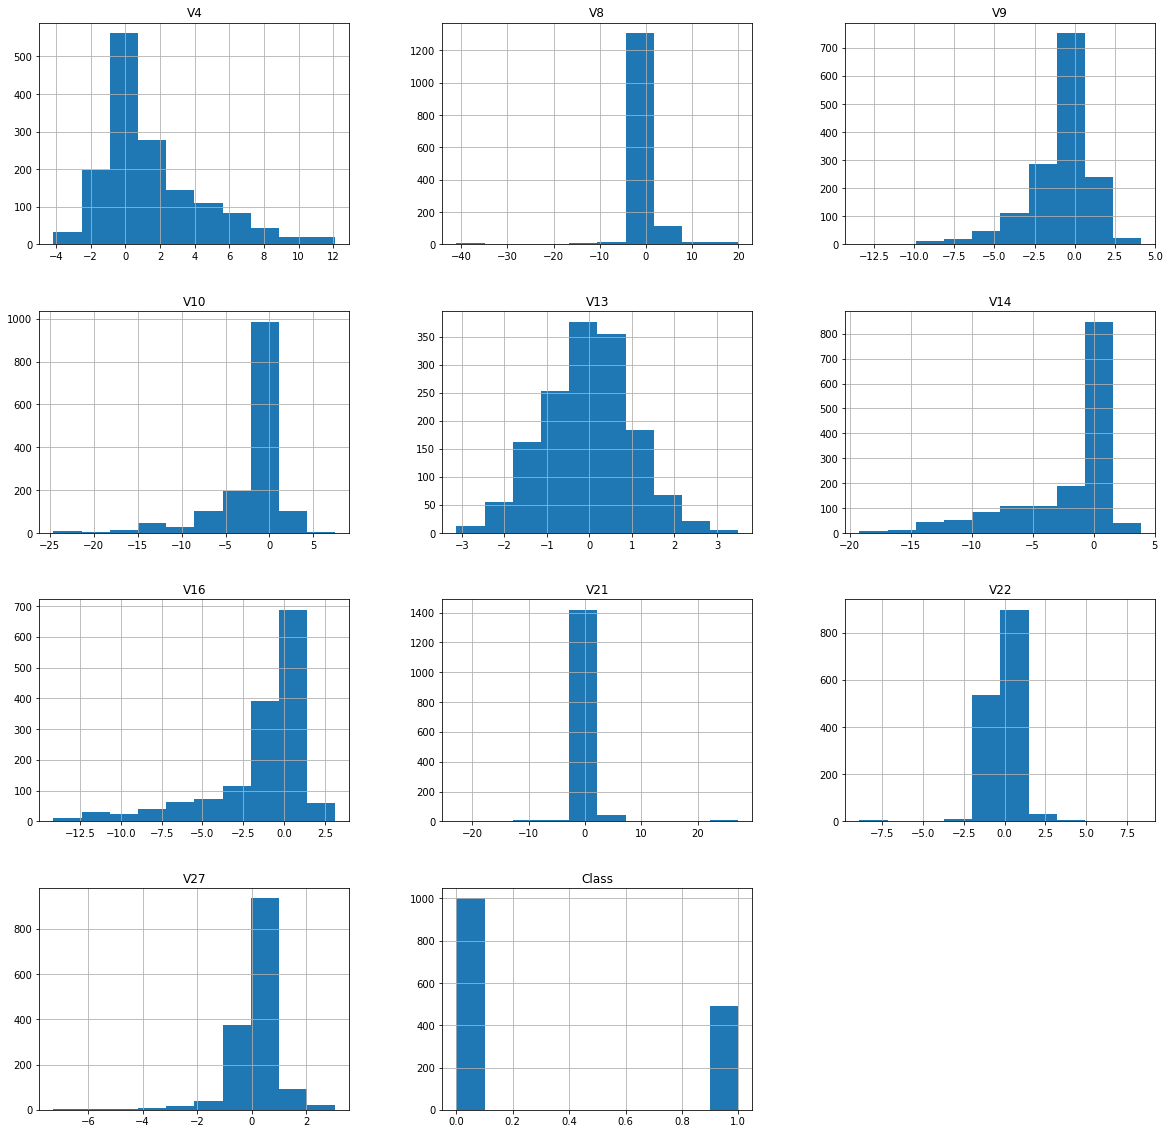

In [37]:
# гистограмма
dataframe.hist(figsize=(20,20))
pyplot.show()

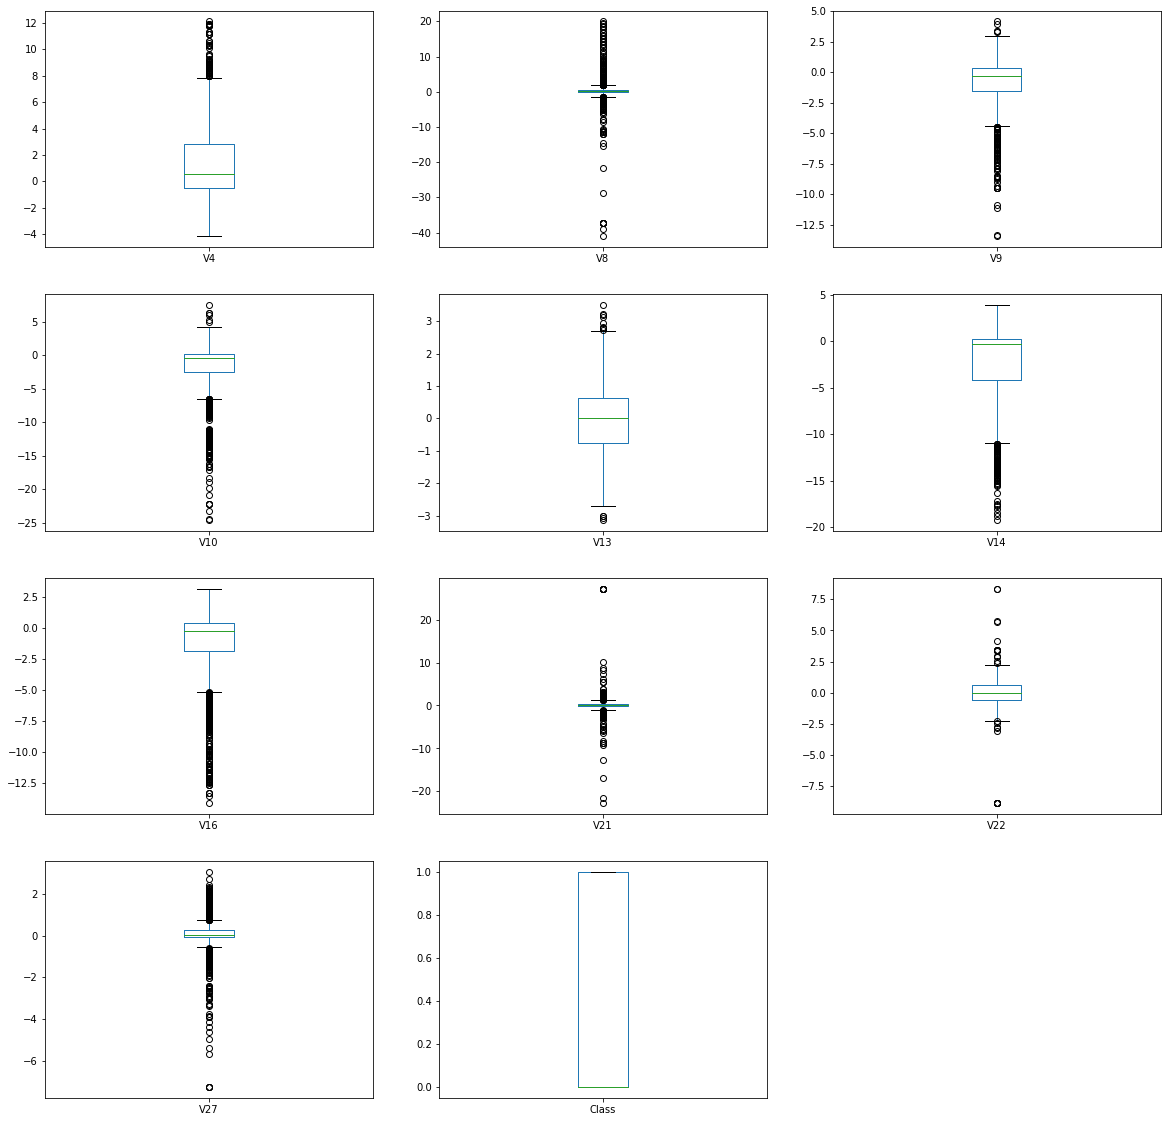

In [38]:
# ящик с усами
dataframe.plot(kind='box', subplots=True, layout=(4,3), sharex=False, sharey=False, figsize=(20,20))
pyplot.show()

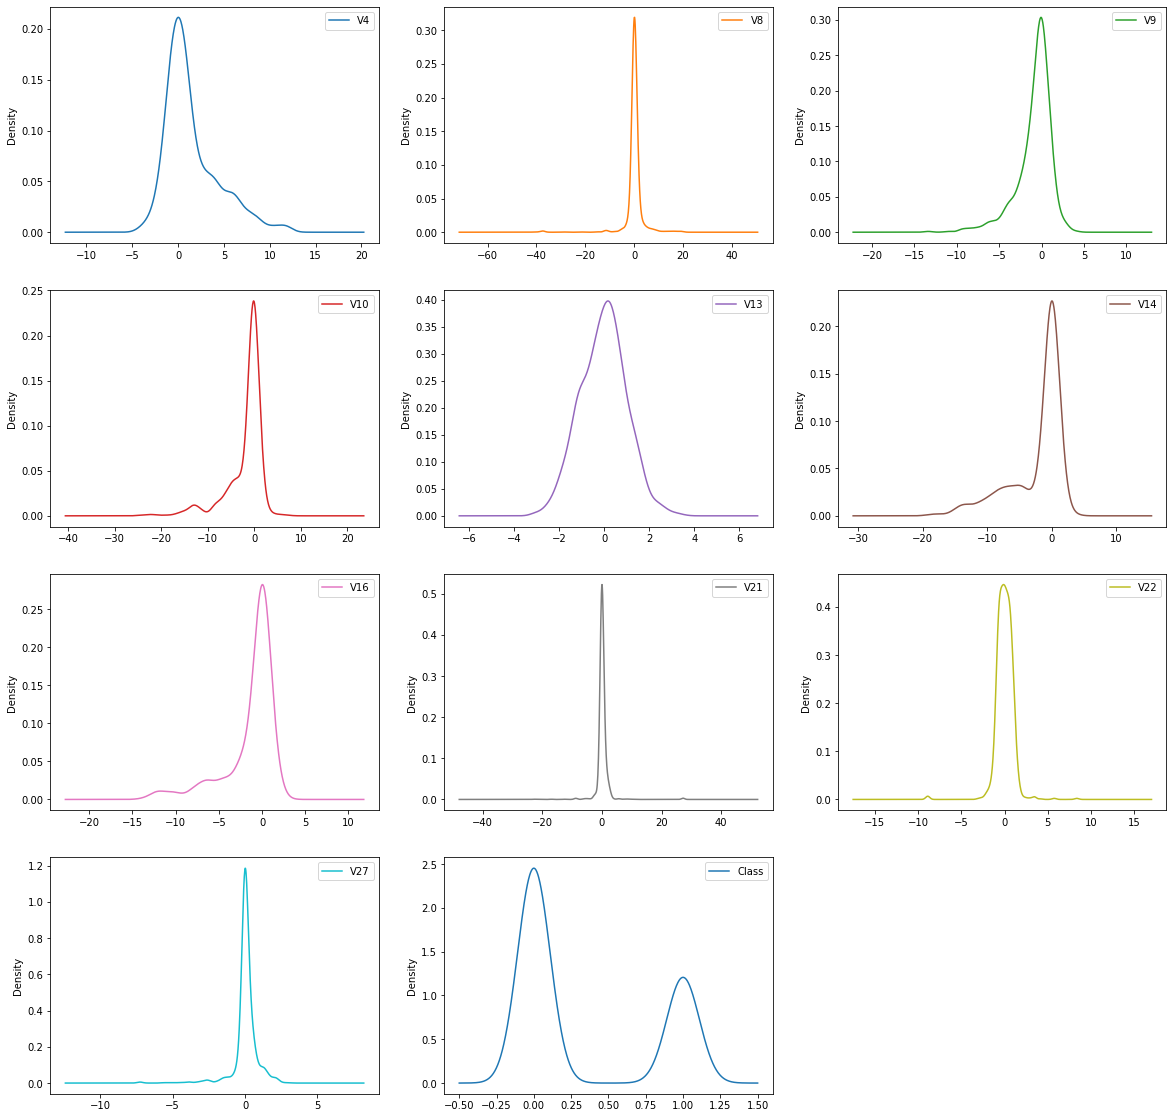

In [39]:
# ядерная оценка плотности
dataframe.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize=(20,20))
pyplot.show()

<AxesSubplot:>

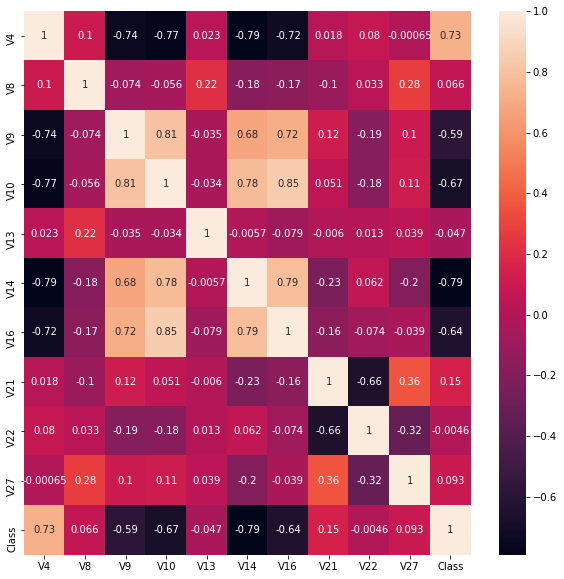

In [40]:
# коррелограмма
fig = pyplot.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(), annot=True)

## Тестовая и обучаюшая выборки

In [41]:
array = dataframe.values
X = array[:,0:10]
Y = array[:,10]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

## Алгоритмы классификации

In [42]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) # логистическая регрессия
models.append(('LDA', LinearDiscriminantAnalysis())) # дискрименантный анализ
models.append(('KNN', KNeighborsClassifier())) # к-ближайших соседей
models.append(('CART', DecisionTreeClassifier())) # деревья классификации
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [43]:
# evaluate each model in turn
num_folds = 10
seed = 7
scoring = 'accuracy'

In [44]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.950960 (0.020695)
LDA: 0.924889 (0.033360)
KNN: 0.949970 (0.025274)
CART: 0.930949 (0.017524)
NB: 0.940970 (0.028058)
SVM: 0.946960 (0.025298)


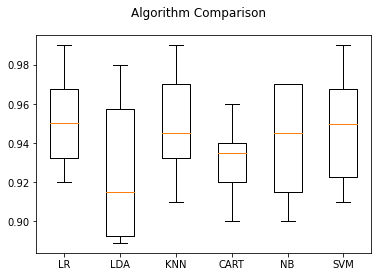

In [45]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Оценка алгоритмов: стандартизация данных

In [46]:
# стандартизация данных
pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM',
SVC(gamma='auto'))])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.951960 (0.019374)
ScaledLDA: 0.924889 (0.033360)
ScaledKNN: 0.939949 (0.025671)
ScaledCART: 0.931939 (0.020858)
ScaledNB: 0.940970 (0.028058)
ScaledSVM: 0.945960 (0.027980)


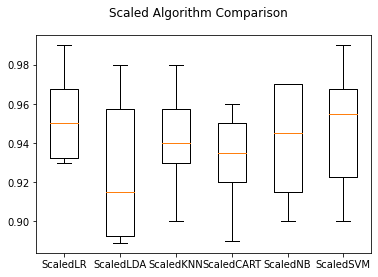

In [47]:
# ящик с усами
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Подбор параметров

In [48]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.35, 0.5, 0.75, 1, 1.3, 1.5, 1.7, 2, 3]
param_grid = dict(C=c_values)

model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.951960 using {'C': 0.75}
0.950960 (0.023839) with: {'C': 0.1}
0.947960 (0.022695) with: {'C': 0.35}
0.948960 (0.021636) with: {'C': 0.5}
0.951960 (0.019374) with: {'C': 0.75}
0.951960 (0.019374) with: {'C': 1}
0.951960 (0.019374) with: {'C': 1.3}
0.951960 (0.019374) with: {'C': 1.5}
0.951960 (0.019374) with: {'C': 1.7}
0.950960 (0.020695) with: {'C': 2}
0.950960 (0.020695) with: {'C': 3}


## Ансамблевые методы

In [49]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.947970 (0.020364)
GBM: 0.948960 (0.019701)
RF: 0.950970 (0.021630)
ET: 0.946960 (0.025690)


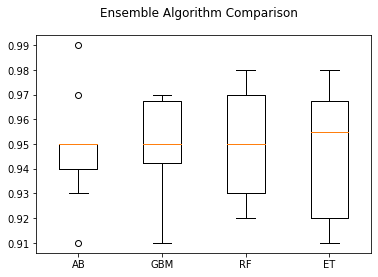

In [50]:
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Предсказание

In [52]:
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size, random_state=seed)

In [53]:
lr = LogisticRegression(C=0.75)
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9553752535496958
[[333   7]
 [ 15 138]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       340
         1.0       0.95      0.90      0.93       153

    accuracy                           0.96       493
   macro avg       0.95      0.94      0.95       493
weighted avg       0.96      0.96      0.96       493

